Imports

In [13]:
import sys
import os


scripts_path = os.path.abspath('scripts')
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

from functions import *
from findPath import path_detection

Definir que o easyocr sera o leitor utilizado para ler os textos

In [14]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Função que recebe a imagem e retorna diferentes dados baseado no tipo de situação que a imagem representa. 
* Combate = ataques
* Dialogo = texto e opções
* Mapa = espaço andavel

In [16]:
def funcao_global(image):
    if identificar_texto(image,reader): #verifica se tem algum texto na imgem, para verificar se se trata de um mapa ou de um cmobate/cutscene
        combate,opcoes_combate = identificar_combate(image,reader)
        if combate:#se for combate
            return opcoes_combate #retorna lista com opcoes de combate
        else: #se for cutscene
            return options_cutscene(image,reader) #retorna lista com yes,no ou vazia
    else: #se for mapa
        return path_detection(image) #retorna o mapa com o caminho desenhado no formato de matrix, tendo o chão valor 0.
    


Dicionario com diferentes imagens para textes

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

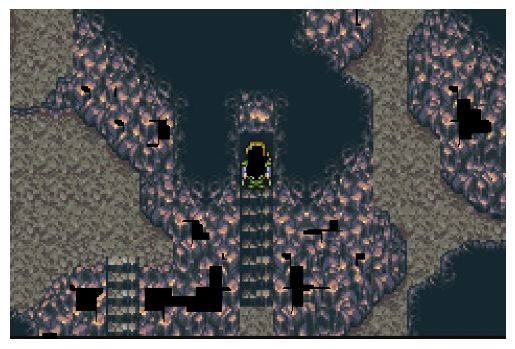

In [20]:
dicionario = {
    'combat1': 'FFVI\\Combat\\combate.jpg',
    'combat2': 'FFVI\\Combat\\combate2.jpg',
    'combat3': 'FFVI\\Combat\\combate3.jpg',
    'cutscene1': 'FFVI\\Dialog\\options.jpg',
    'cutscene2': 'FFVI\\Dialog\\textbox_with_img.png',
    'cutscene3': 'FFVI\\Dialog\\texto_baixo.png',
    'map1': 'FFVI\\Maps\\azysla.jpg',
    'map2': 'FFVI\\Maps\\caverna_interior.jpg',
    'map3': 'FFVI\\Maps\\planicie.jpg',

}
choice = 'map2'
imagem = dicionario[choice]
funcao_global(imagem)